In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
two_dice_image = cv2.imread("input/2_dice.png", cv2.IMREAD_GRAYSCALE)
three_dice_image = cv2.imread("input/3_dice.png", cv2.IMREAD_GRAYSCALE)
five_dice_image = cv2.imread("input/5_dice.png", cv2.IMREAD_GRAYSCALE)

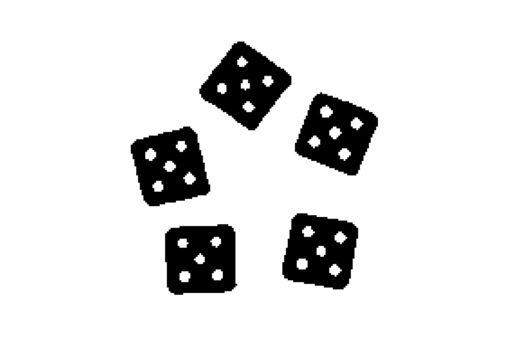

In [9]:
image = five_dice_image.copy()
noise_reduced_image = cv2.medianBlur(image, 7)
_, threshold_image = cv2.threshold(noise_reduced_image, 180, 255, cv2.THRESH_BINARY_INV)

plt.imshow(threshold_image, "grey")
plt.axis(False)
plt.show()

[[[  0   0]]

 [[  0 182]]

 [[274 182]]

 [[274   0]]]


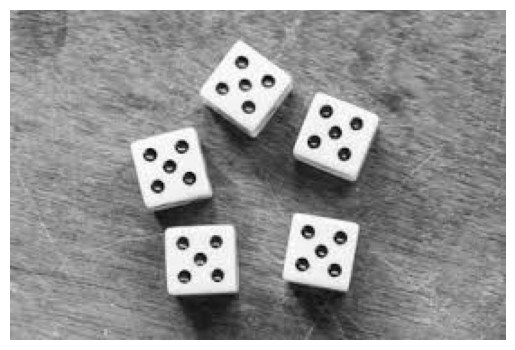

In [10]:
contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
counter = 0
prev_value = None
for contour in contours:
    # current_value = hierarchy[0][counter][3]
    # if prev_value is None:
    #     prev_value = current_value
    # elif current_value != prev_value:
    #     print("Pattern changed at:", counter)
    #     prev_value = current_value

    # if hirer_key[0][counter][3] == 0:
    # if hierarchy[0][counter][3] == 1:
    # if cv2.contourArea(contour) < 700:
    print(contour)
    break
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, [x, y], [x + w, y + h], (0, 0, 0), 1)
    counter += 1

plt.imshow(image, "grey")
plt.axis(False)
plt.show()

[]


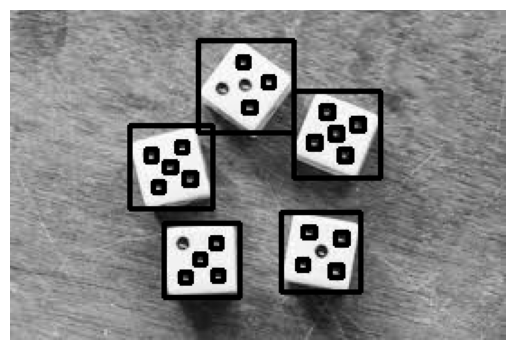

In [11]:
contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
result = image.copy()
hierarchy_index = []
output = []
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    if 5 < w < result.shape[0]/1.5 and 5 < h < result.shape[1]/1.5:
        cv2.rectangle(result, (x,y), (x+w, y+h), (0, 0, 255), 2)
        hierarchy_index.append(i)
        # print(f'{i}, w: {w} , h: {h} , {hierarchy[0][i]}')
        if hierarchy[0][i][3] == -1:
            score = 0
            child = hierarchy[0][i][2]
            while child != -1 and score < 6:
                score += 1
                child = hierarchy[0][child][0]
            cv2.putText(result, f'{score}', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), thickness= 1)
            output.append(score)

print(output)
cv2.imwrite(f'output/dice_number.png', result)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()